## EMAIL SPAM DETECTION WITH MACHINE LEARNING

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
df=pd.read_csv('spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.size

27860

## Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [9]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.sample(4)

,v1,v2
2232,ham,Nothing just getting msgs by dis name wit diff...
3867,ham,"not that I know of, most people up here are st..."
4872,ham,Lol! Oops sorry! Have fun.
4148,ham,Haven't found a way to get another app for you...


In [10]:
# renaming the columns
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)
df.sample(4)

,Target,Text
3399,spam,"As a valued customer, I am pleased to advise y..."
4163,ham,"Its ok, called mom instead have fun"
1774,ham,"Its ok chikku, and its my 1 of favourite song...."
4294,spam,HMV BONUS SPECIAL 500 pounds of genuine HMV vo...


## Encoding

In [12]:
lab_en=LabelEncoder()

In [13]:
df['Target']=lab_en.fit_transform(df['Target'])
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# checking missing values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [15]:
df.duplicated().sum()

403

In [16]:
# Removing duplicates
df=df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

## EDA

In [20]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

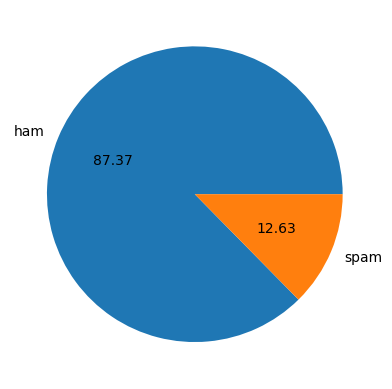

In [22]:
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [23]:
!pip install nltk

In [24]:
import nltk

In [25]:
# finding no.of charcters in sms/email
df['Text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: Text, Length: 5169, dtype: int64

In [26]:
# adding numbers of characters to the dataset
df['num_characters']=df['Text'].apply(len)
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
# Fetcing for numbers of words
df['Text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Text, Length: 5169, dtype: object

In [28]:
df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: Text, Length: 5169, dtype: int64

In [29]:
df['num_words']= df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [30]:
# finding no.of sentences 
df['Text'].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: Text, Length: 5169, dtype: object

In [31]:
df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: Text, Length: 5169, dtype: int64

In [32]:
df['num_sentences']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [33]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
# ham
df[df['Target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='num_characters', ylabel='Count'>

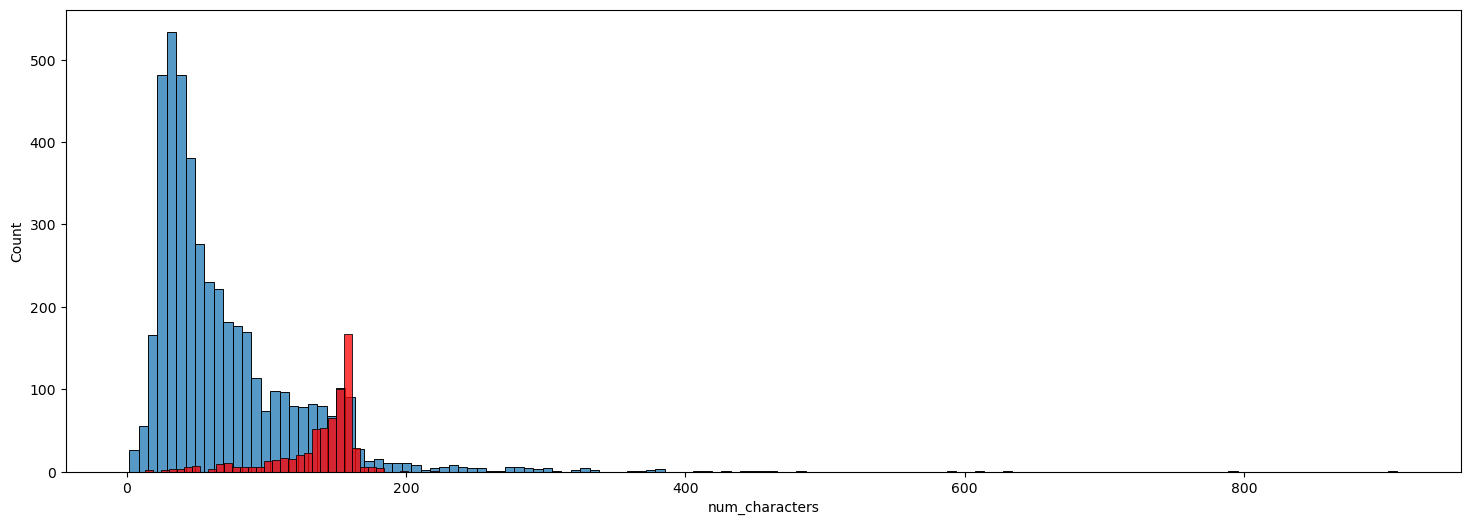

In [35]:
plt.figure(figsize=(18,6))
sns.histplot(df[df['Target']==0]['num_characters']) #ham
sns.histplot(df[df['Target']==1]['num_characters'],color='red') #spam


<Axes: xlabel='num_words', ylabel='Count'>

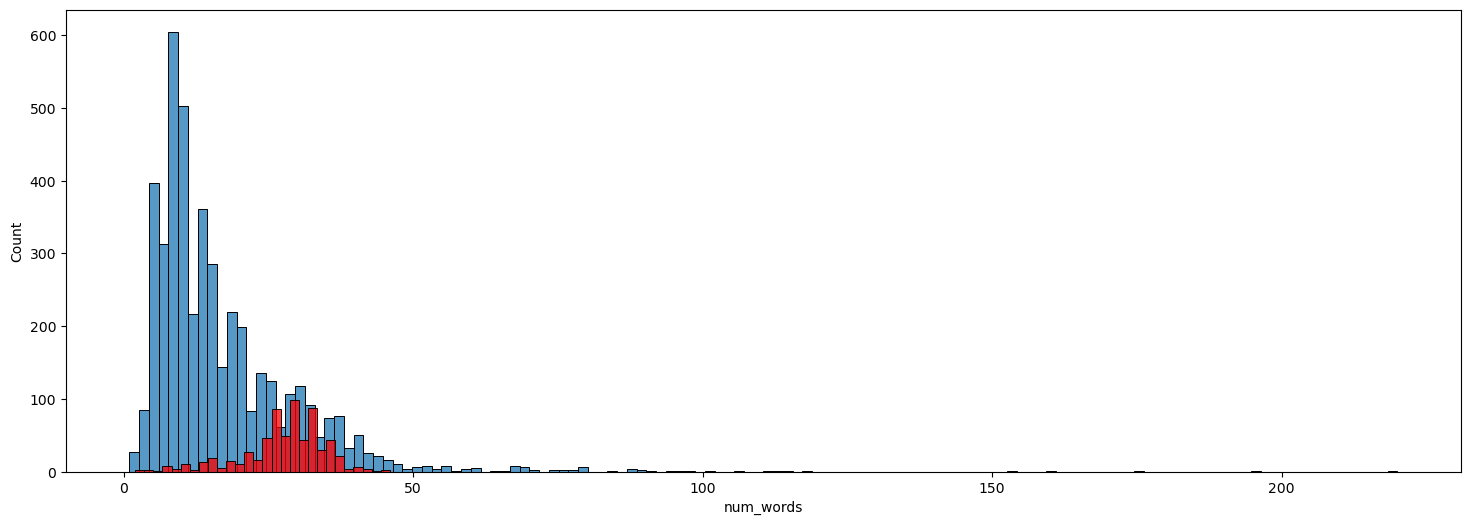

In [36]:
plt.figure(figsize=(18,6))
sns.histplot(df[df['Target']==0]['num_words']) #ham
sns.histplot(df[df['Target']==1]['num_words'],color='red') #spam


<Axes: xlabel='num_sentences', ylabel='Count'>

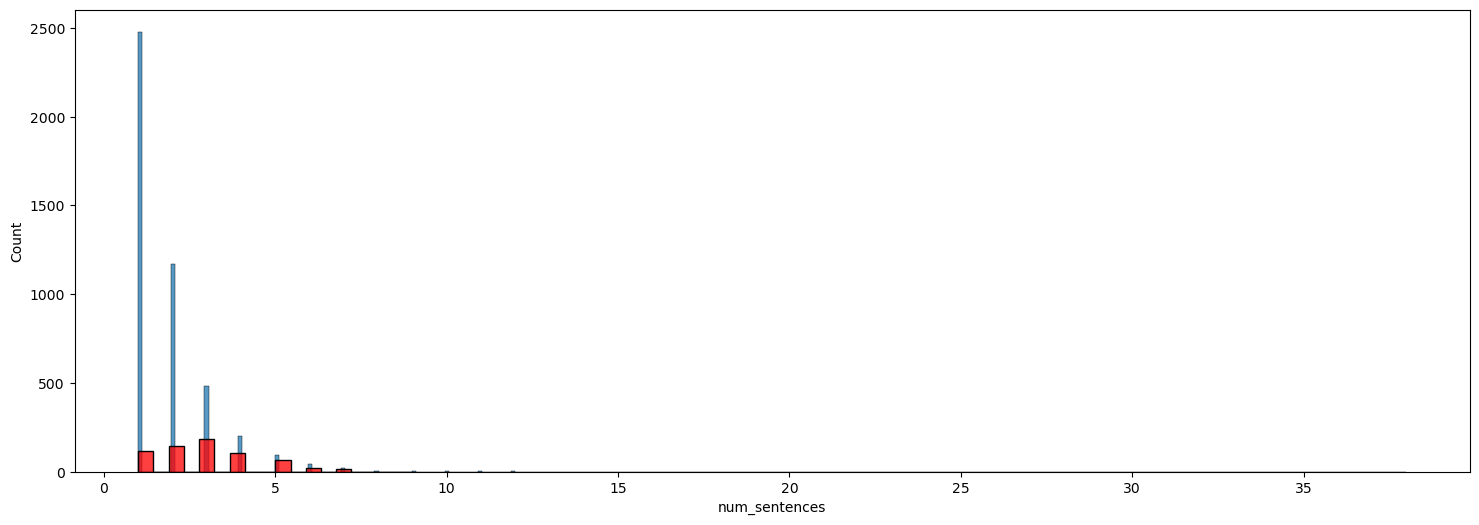

In [37]:
plt.figure(figsize=(18,6))
sns.histplot(df[df['Target']==0]['num_sentences']) #ham
sns.histplot(df[df['Target']==1]['num_sentences'],color='red') #spam


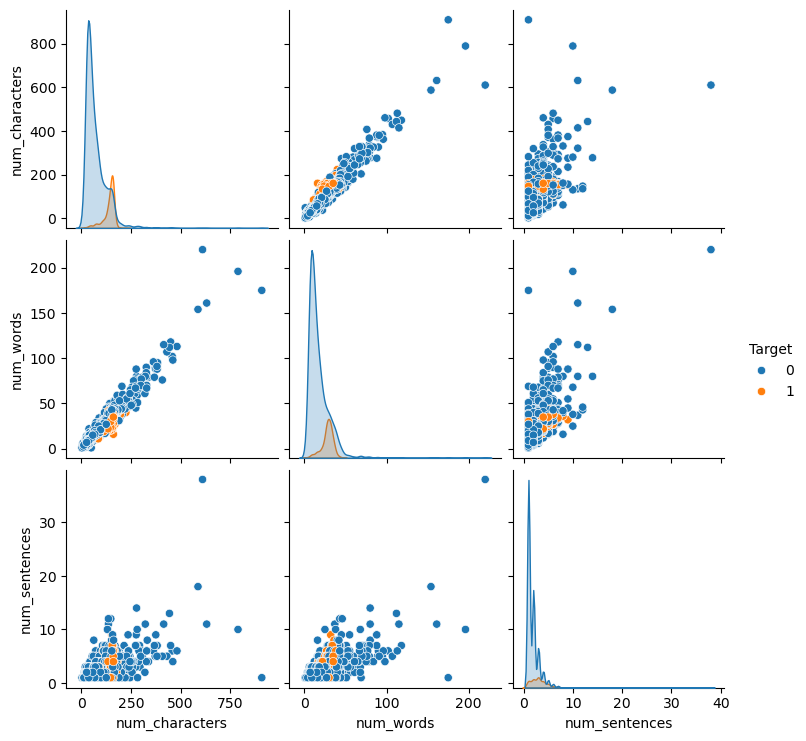

In [38]:
sns.pairplot(df,hue='Target')

## Data Preprocessing

In [40]:
# lower
def transform_text1(text1):
    text1=text1.lower()
    return text1

In [41]:
transform_text1('HI Hello How aRe YoU')

'hi hello how are you'

In [42]:
# Tokenization
def transform_text2(text2):
    text2=nltk.word_tokenize(text2)
    return text2

In [43]:
transform_text2('HI Hello How aRe YoU')

['HI', 'Hello', 'How', 'aRe', 'YoU']

In [44]:
# Removing special characters
def transform_text3(text3):
    y=[]
    for i in text3:
        if i.isalnum():
            y.append(i)
    return y

In [45]:
print(transform_text3('HI Hello @How % #29 aRe YoU ?'),end='')

['H', 'I', 'H', 'e', 'l', 'l', 'o', 'H', 'o', 'w', '2', '9', 'a', 'R', 'e', 'Y', 'o', 'U']

In [46]:
def transform_text4(text4):
    text4=text4.lower()
    text4=nltk.word_tokenize(text4)
    a=[]
    for i in text4:
        if i.isalnum():
            a.append(i)
    return a

In [47]:
print(transform_text4('HI Hello @How % #29 aRe YoU ?'),end='')

['hi', 'hello', 'how', '29', 'are', 'you']

In [48]:
# Removing stop words and punctuation
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [49]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [50]:
def transform_text5(text5):
    text5=text5.lower()
    text5=nltk.word_tokenize(text5)
    b=[]
    for i in text5:
        if i.isalnum():
            b.append(i)
    text5=b[:]
    b.clear()
    for i in text5:
        if i not in stopwords.words('english') and i not in string.punctuation:
            b.append(i)
    return b
    

In [51]:
print(transform_text5('HI Hello @How % #29 aRe YoU ?'),end='')


['hi', 'hello', '29']

In [52]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('Singing')

'sing'

In [53]:
def transform_text6(text6):
    text6=text6.lower()
    text6=nltk.word_tokenize(text6)
    c=[]
    for i in text6:
        if i.isalnum():
            c.append(i)
    text6=c[:]
    c.clear()
    for i in text6:
        if i not in stopwords.words('english') and i not in string.punctuation:
            c.append(i)
    text6=c[:]
    c.clear()
    for i in text6:
        c.append(ps.stem(i))
    return " ".join(c)
    

In [54]:
transform_text6('Iam doing a internship in oasis what about you?')

'iam internship oasi'

In [55]:
df['Text'][200]

'I sent you  &lt;#&gt;  bucks'

In [56]:
transform_text6('I sent you  &lt;#&gt;  bucks')


'sent lt gt buck'

In [57]:
df['Text'][2000]

"But i'll b going 2 sch on mon. My sis need 2 take smth."

In [58]:
transform_text6('But i ll b going 2 sch on mon. My sis need 2 take smth.')

'b go 2 sch mon si need 2 take smth'

In [59]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [60]:
# applying transform text on Text column
df['Text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: Text, Length: 5169, dtype: object

In [61]:
df['Transform_Text']=df['Text'].apply(transform_text)

In [62]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,Transform_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [63]:
# Top 30 words inspam(Target=1)
df[df['Target']==1]['Transform_Text']

2       free entri 2 wkli comp win fa cup final tkt 21...
5       freemsg hey darl 3 week word back like fun sti...
8       winner valu network custom select receivea pri...
9       mobil 11 month u r entitl updat latest colour ...
11      six chanc win cash 100 pound txt csh11 send co...
                              ...                        
5537    want explicit sex 30 sec ring 02073162414 cost...
5540    ask 3mobil 0870 chatlin inclu free min india c...
5547    contract mobil 11 mnth latest motorola nokia e...
5566    remind o2 get pound free call credit detail gr...
5567    2nd time tri 2 contact u pound prize 2 claim e...
Name: Transform_Text, Length: 653, dtype: object

In [64]:
x=df[df['Target']==1]['Transform_Text'].tolist()

In [65]:
for msg in df[df['Target']==1]['Transform_Text'].tolist():
    print(msg.split())

['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', 'text', 'fa', '87121', 'receiv', 'entri', 'question', 'std', 'txt', 'rate', 'c', 'appli', '08452810075over18']
['freemsg', 'hey', 'darl', '3', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chg', 'send', 'rcv']
['winner', 'valu', 'network', 'custom', 'select', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl341', 'valid', '12', 'hour']
['mobil', '11', 'month', 'u', 'r', 'entitl', 'updat', 'latest', 'colour', 'mobil', 'camera', 'free', 'call', 'mobil', 'updat', 'co', 'free', '08002986030']
['six', 'chanc', 'win', 'cash', '100', 'pound', 'txt', 'csh11', 'send', 'cost', '6day', 'tsandc', 'appli', 'repli', 'hl', '4', 'info']
['urgent', '1', 'week', 'free', 'membership', 'prize', 'jackpot', 'txt', 'word', 'claim', '81010', 'c', 'lccltd', 'pobox', '4403ldnw1a7rw18']
['xxxmobilemovieclub', 'use', 'credit', 'click', 'wap', 'link', 'next', 'txt', 'messag', 'c

In [66]:
spam_corpus=[]
for msg in df[df['Target']==1]['Transform_Text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [67]:
len(spam_corpus)

9939

In [69]:
from collections import Counter
Counter(spam_corpus)

Counter({'call': 320,
         'free': 191,
         '2': 155,
         'txt': 141,
         'text': 122,
         'u': 119,
         'ur': 119,
         'mobil': 114,
         'stop': 104,
         'repli': 103,
         'claim': 98,
         '4': 97,
         'prize': 82,
         'get': 74,
         'new': 64,
         'servic': 64,
         'tone': 63,
         'send': 60,
         'urgent': 57,
         'nokia': 57,
         'contact': 56,
         'award': 55,
         'phone': 52,
         'cash': 51,
         'pleas': 51,
         'week': 49,
         'win': 48,
         'c': 45,
         'collect': 45,
         'min': 45,
         'custom': 42,
         'messag': 42,
         'guarante': 42,
         'per': 41,
         'chat': 38,
         'tri': 37,
         'msg': 35,
         'draw': 35,
         'number': 35,
         'cs': 35,
         'show': 33,
         'today': 33,
         'offer': 33,
         'line': 33,
         'go': 32,
         'receiv': 31,
         'want': 3

In [71]:
pd.DataFrame(Counter(spam_corpus).most_common(30)).head()

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


## Model Buildinng

In [73]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

In [75]:
cv=CountVectorizer()
x=cv.fit_transform(df['Transform_Text']).toarray()
x                   

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [77]:
x.shape

(5169, 6708)

In [79]:
y=df['Target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [81]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)


In [83]:
# Navies Bayes perform good with textual data
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score

In [85]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred_gnb = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred_gnb))
print(confusion_matrix(y_test,y_pred_gnb))
print(precision_score(y_test,y_pred_gnb))
print(classification_report(y_test,y_pred_gnb))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       896
           1       0.53      0.86      0.66       138

    accuracy                           0.88      1034
   macro avg       0.75      0.87      0.79      1034
weighted avg       0.92      0.88      0.89      1034



In [87]:
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
y_pred_mnb = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred_mnb))
print(confusion_matrix(y_test,y_pred_mnb))
print(precision_score(y_test,y_pred_mnb))
print(classification_report(y_test,y_pred_mnb))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       896
           1       0.83      0.91      0.87       138

    accuracy                           0.96      1034
   macro avg       0.91      0.94      0.93      1034
weighted avg       0.97      0.96      0.96      1034



In [89]:
bnb = BernoulliNB()
bnb.fit(x_train,y_train)
y_pred_bnb = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred_bnb))
print(confusion_matrix(y_test,y_pred_bnb))
print(precision_score(y_test,y_pred_bnb))
print(classification_report(y_test,y_pred_bnb))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       0.97      0.80      0.88       138

    accuracy                           0.97      1034
   macro avg       0.97      0.90      0.93      1034
weighted avg       0.97      0.97      0.97      1034



In [91]:
# To get more precision score go for tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [93]:
x_tfidf = tfidf.fit_transform(df['Transform_Text']).toarray()
x_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [95]:
x_tfidf.shape

(5169, 6708)

In [97]:
y_tfidf = df['Target'].values
y_tfidf

array([0, 0, 1, ..., 0, 0, 0])

In [99]:
y_tfidf.shape

(5169,)

In [101]:
x_train_tfidf,x_test_tfidf,y_train_tfidf,y_test_tfidf = train_test_split(x_tfidf,y_tfidf,test_size=0.2,random_state=2)

In [103]:
gnb = GaussianNB()
gnb.fit(x_train_tfidf,y_train_tfidf)
y_pred_gnb_tfidf = gnb.predict(x_test_tfidf)
print(accuracy_score(y_test_tfidf,y_pred_gnb_tfidf))
print(confusion_matrix(y_test_tfidf,y_pred_gnb_tfidf))
print(precision_score(y_test_tfidf,y_pred_gnb_tfidf))
print(classification_report(y_test_tfidf,y_pred_gnb_tfidf))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       896
           1       0.52      0.82      0.64       138

    accuracy                           0.88      1034
   macro avg       0.75      0.85      0.78      1034
weighted avg       0.91      0.88      0.89      1034



In [105]:
bnb = BernoulliNB()
bnb.fit(x_train_tfidf,y_train_tfidf)
y_pred_bnb_tfidf = bnb.predict(x_test_tfidf)
print(accuracy_score(y_test_tfidf,y_pred_bnb_tfidf))
print(confusion_matrix(y_test_tfidf,y_pred_bnb_tfidf))
print(precision_score(y_test_tfidf,y_pred_bnb_tfidf))
print(classification_report(y_test_tfidf,y_pred_bnb_tfidf))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       0.97      0.80      0.88       138

    accuracy                           0.97      1034
   macro avg       0.97      0.90      0.93      1034
weighted avg       0.97      0.97      0.97      1034



In [107]:
mnb = MultinomialNB()
mnb.fit(x_train_tfidf,y_train_tfidf)
y_pred_mnb_tfidf = mnb.predict(x_test_tfidf)
print(accuracy_score(y_test_tfidf,y_pred_mnb_tfidf))
print(confusion_matrix(y_test_tfidf,y_pred_mnb_tfidf))
print(precision_score(y_test_tfidf,y_pred_mnb_tfidf))
print(classification_report(y_test_tfidf,y_pred_mnb_tfidf))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       896
           1       1.00      0.70      0.82       138

    accuracy                           0.96      1034
   macro avg       0.98      0.85      0.90      1034
weighted avg       0.96      0.96      0.96      1034



## Conclusion

In [ ]:
multinomial navie bays with tfidf got accuracy xocre 